# Simulations of scattering event according to original dynamics

In [ ]:
using NBInclude

@nbinclude("functions.ipynb")

In [1056]:
using Ranges

global v0::Float64 = 10.0; # Self-propulsion speed
global int_range::Float64 = 1; #Range of interactions
global gamma::Float64 = 1.0; # Intensity of interactions
global dtf::Float64 = 1e-4;

#Define required vectors and variables for saving results

total_N = 100;
dphi = 2*pi/total_N;
phi1seq = range(-pi, pi, total_N);
phi2seq = range(-pi, pi, total_N);
deltaps = Float64[];
dinit = Float64[];

# Simulate the scattering events and save outgoing angle

generate!(dinit, deltaps,
        dphi,
        gamma, v0, int_range, 0.0,
        dtf);


LoadError: InterruptException:

In [975]:
pos_deltaps = Float64[];
pos_dinit = Float64[];
for i in 1:length(deltaps)
   if deltaps[i] < 0
        push!(pos_dinit, dinit[i]);
        push!(pos_deltaps, deltaps[i]);
    end
end
    

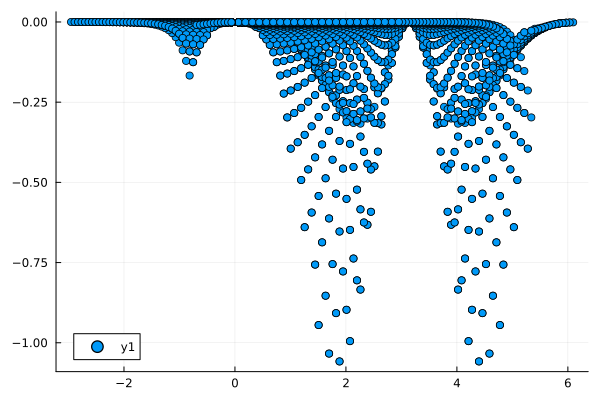

In [1055]:
scatter(dinit,deltaps)

In [989]:
#Run simulations at fixed v_0 for different values of dissipation
using Plots

#Variables for simulation
total_N = 100;
dphi = 2*pi/total_N;
phi1seq = range(-pi, pi, total_N);
phi2seq = range(-pi, pi, total_N);
deltaps = Float64[];
dinit = Float64[];
v0 = 100;

#Ranges of values for dissipation intensity
cranges = 0.1:0.1:1;

#Colours palette
palettes = range(colorant"red", stop=colorant"green", length=length(cranges));

#Generate first plot
generate!(dinit, deltaps,
        dphi,
        gamma, v0, int_range, 0.0,
        dtf);
rangex = -(pi):dphi:(pi-dphi);
avgpdp = zeros(length(rangex));
totn = zeros(length(rangex));
for x in 2:length(rangex)
    for i in 1:length(dinit)
        if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
            avgpdp[x]+=deltaps[i];
            totn[x]+=1;
        end
    end
end
avgpdp = avgpdp./totn;

p = plot(rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[1])
xlabel!(p, "Delta")
ylabel!(p, "pdp")

#Generate plots for all ranges of intensities
for i in 1:length(cranges)
   generate!(dinit, deltaps,
        dphi,
        gamma, v0, int_range, cranges[i],
        dtf);
    
    avgpdp = zeros(length(rangex));
    totn = zeros(length(rangex));
    for x in 2:length(rangex)
        for i in 1:length(dinit)
            if modulate(dinit[i]) <= rangex[x] && modulate(dinit[i]) > rangex[x-1]
                avgpdp[x]+=deltaps[i];
                totn[x]+=1;
            end
        end
    end
    avgpdp = avgpdp./totn;

    plot!(p, rangex[Int(total_N/2):(total_N-1)], avgpdp[Int(total_N/2):(total_N-1)], xticks=pitick(-pi,pi,4), color = palettes[i])
end

LoadError: BoundsError: attempt to access 50-element StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} at index [50:99]

In [990]:
p
#savefig("pdpv0100VaringDissfrom0to1.pdf")

"/data/others/ciarchi/Antialign/Julia/pdpv0100VaringDissfrom0to1.pdf"

In [1180]:
phi10 = pi/2+0.1;
phi20 = -1.0;
pdp, phi1t, phi2t, a11, a22 = scatteringmovie(phi10,phi20,1.0,1e-7, 
                            1.0, 100.0, 0.0);

In [1181]:
using Plots

lims = 10;
steps = 1000;
animd = @animate for i in 1:steps:length(a11)
    plot(Tuple.(a11[i]), xlims=(-lims,lims), ylims=(-5,5))
    plot!(Tuple.(a22[i]))
end

Animation("/tmp/jl_fxUWie", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000086.png", "000087.png", "000088.png", "000089.png", "000090.png", "000091.png", "000092.png", "000093.png", "000094.png", "000095.png"])

[ Info: Saved animation to /data/others/ciarchi/Antialign/Julia/tmp.gif


Plots.AnimatedGif("/data/others/ciarchi/Antialign/Julia/tmp.gif")
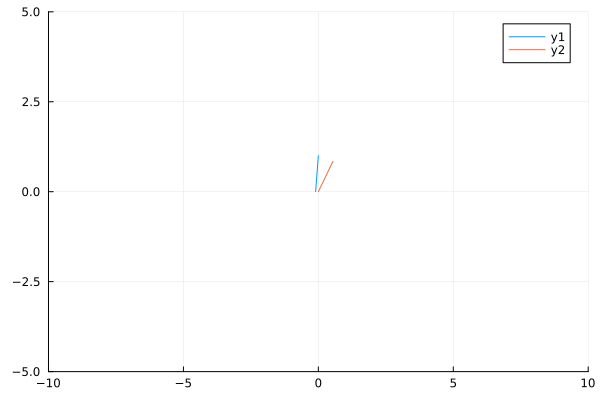

In [1182]:
gif(animd, fps=30)

In [1183]:
print(phi1t, " ", phi10,"\n")
print(phi2t, " ", phi20,"\n")

-2.1380548850950234 1.6707963267948966
1.4743236315044101 -1.0


In [1173]:
print(phi1t-phi2t, "\n")
print(phi10-phi20, "\n")
print(phi10-phi20-2*pi)

-5.782856333390636
5.783020777905339
-0.5001645292742474

In [1184]:
pdp

-0.0014435045682052129

In [1186]:
pi-phi2t

1.667269022085383